<div align="center">

# Customer Segmentation & Retention Analysis (RFM Model)
### Data Cleaning • Exploration • Segmentation • Insights

</div>

# 03(Part 1)_Segmentation Mapping & Labels 

---

### Goal
Use the RFM scores computed earlier to create **interpretable customer segments** (e.g., *Champions*, *At Risk*, *Lost*) and visualize their distribution for business insights.

**Objective:**  
Transform numeric RFM metrics into meaningful customer categories that help in marketing strategy and retention planning.

---

### 🧩 Work Structure
We’ll follow this short, clear workflow:
1. Load RFM dataset  
2. Review score distributions  
3. Define segmentation rules  
4. Map segments based on RFM values  
5. Summarize segment statistics  
6. Visualize distribution  
7. Save segmented dataset  


## Step 1: Load RFM Dataset
We begin by loading the cleaned and processed RFM dataset.  
This dataset already contains Recency, Frequency, Monetary, and the derived RFM_score columns.


In [10]:
# 🪜 Step 1: Load RFM Dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load RFM dataset from previous phase
rfm = pd.read_csv(r'C:\Users\AZAN LAPTOP STORE\Downloads\Portfolio\Projects\Customer Segmentation & Retention Analysis (RFM Model)\data\customer_rfm.csv')

# Quick overview
rfm.head()


,CustomerID,Recency,Frequency,Monetary,Monetary_log,R_score,F_score,M_score,RFM_score
0,12347.0,2,7,3314.73,8.106433,5,5,5,555
1,12348.0,249,3,90.20,4.513055,1,3,1,131
2,12349.0,19,1,999.15,6.907905,4,1,4,414
3,12350.0,310,1,294.40,5.688330,1,1,2,112
4,12352.0,36,7,1130.94,7.031688,3,5,4,354


# Step 2: Review R, F, M Score Distributions
Before assigning segments, we review how R, F, and M are distributed.  
This helps us understand which combinations (like `555`, `454`, `111`) are most common.


In [12]:
# Distribution of individual R, F, M scores
rfm[['R_score', 'F_score', 'M_score']].describe()

# Frequency count of overall RFM score combinations
rfm['RFM_score'].value_counts().head(10)


RFM_score
555    338
455    173
111    170
121    145
444    126
112    124
122     94
211     88
544     83
233     82
Name: count, dtype: int64

# Step 3: Define Segmentation Rules
We define logical rules that translate numeric RFM patterns into easy-to-read labels.  
These can later guide targeted marketing actions.


In [13]:
# 🪜 Step 3: Define Segmentation Rules

def segment_customer(r, f, m):
    if (r >= 4) and (f >= 4) and (m >= 4):
        return 'Champions'
    elif (r >= 3) and (f >= 3):
        return 'Loyal Customers'
    elif (r >= 4) and (f <= 2):
        return 'Recent Buyers'
    elif (r <= 2) and (f >= 4):
        return 'At Risk'
    elif (r <= 2) and (f <= 2):
        return 'Lost Customers'
    else:
        return 'Others'

rfm['Segment'] = rfm.apply(lambda x: segment_customer(x['R_score'], x['F_score'], x['M_score']), axis=1)


# Step 4: Segment Overview Table
We generate a concise summary table showing how many customers belong to each segment and how much revenue they represent.  
This table provides a first insight into which segments are most valuable.


In [14]:
# 🪜 Step 4: Segment Overview Table

# Count and revenue summary by segment
segment_summary = rfm.groupby('Segment').agg({
    'CustomerID': 'count',
    'Monetary': ['mean', 'sum']
}).reset_index()

segment_summary.columns = ['Segment', 'CustomerCount', 'AvgRevenue', 'TotalRevenue']
segment_summary.sort_values(by='TotalRevenue', ascending=False)


,Segment,CustomerCount,AvgRevenue,TotalRevenue
1,Champions,938,2792.451302,2619319.321
3,Loyal Customers,953,807.475918,769524.550
4,Others,700,419.108474,293375.932
2,Lost Customers,1036,255.812791,265022.051
0,At Risk,260,991.139962,257696.390
5,Recent Buyers,304,310.980066,94537.940


# Step 5: Visualize Segment Distribution
A simple bar chart shows the distribution of customers across segments.  
This visualization helps us quickly identify which segment dominates the customer base.


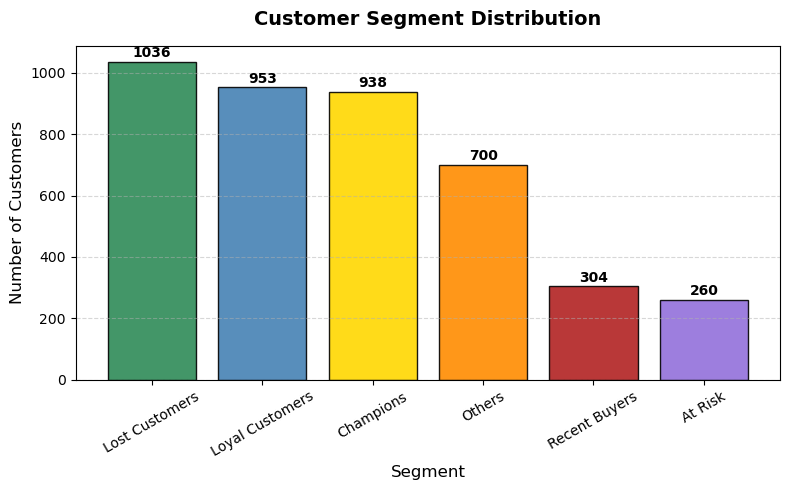

In [24]:
plt.figure(figsize=(8,5))
bars = plt.bar(
    rfm['Segment'].value_counts().index,
    rfm['Segment'].value_counts().values,
    color=['#2E8B57','#4682B4','#FFD700','#FF8C00','#B22222','#9370DB'],
    edgecolor='black',
    alpha=0.9
)

plt.title('Customer Segment Distribution', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Segment', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=30, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Annotate bars with values
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,
             f'{int(bar.get_height())}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# 03(Part 2) — Insights, Business Rules & Action Plan

## Goal
Derive **5 strong, evidence-backed business insights** and **6 tactical actions** from RFM segmentation.

We’ll interpret segment patterns, quantify customer contribution to revenue, and propose data-driven marketing actions.

---

## Step 1: Segment Summary & Revenue Analysis

Before drawing insights, we’ll explore:
- Which segments contribute most to total revenue.
- How many customers belong to each segment.
- Average R, F, M scores across segments.

We'll visualize this to clearly identify **Champions**, **At Risk**, and **Lost** groups.

In [17]:
# Step 1: Segment-level summary
segment_summary = rfm.groupby('Segment').agg({
    'CustomerID': 'nunique',
    'Monetary': ['sum', 'mean'],
    'Recency': 'mean',
    'Frequency': 'mean'
}).round(2)

segment_summary.columns = ['CustomerCount', 'TotalRevenue', 'AvgRevenue', 'AvgRecency', 'AvgFrequency']
segment_summary = segment_summary.reset_index()
segment_summary


,Segment,CustomerCount,TotalRevenue,AvgRevenue,AvgRecency,AvgFrequency
0,At Risk,260,257696.39,991.14,135.52,4.75
1,Champions,938,2619319.32,2792.45,13.30,10.15
2,Lost Customers,1036,265022.05,255.81,216.94,1.08
3,Loyal Customers,953,769524.55,807.48,33.61,3.56
4,Others,700,293375.93,419.11,110.67,1.70
5,Recent Buyers,304,94537.94,310.98,18.69,1.21


## Step 2 — Insights Generation & Evidence-backed Findings

Now that we have summarized customer segments by RFM behavior, we’ll derive **quantitative insights** to understand which segments drive revenue and engagement.  
Each insight will be supported by exact statistics from the data to make it actionable and evidence-based.


In [18]:
# Calculate total revenue and customer base
total_revenue = segment_summary['TotalRevenue'].sum()
total_customers = segment_summary['CustomerCount'].sum()

# Compute percentage contribution for each segment
segment_summary['Revenue_%'] = (segment_summary['TotalRevenue'] / total_revenue * 100).round(2)
segment_summary['Customer_%'] = (segment_summary['CustomerCount'] / total_customers * 100).round(2)

# Sort by total revenue (descending)
segment_summary = segment_summary.sort_values(by='TotalRevenue', ascending=False).reset_index(drop=True)

# Display updated summary with percentages
segment_summary


,Segment,CustomerCount,TotalRevenue,AvgRevenue,AvgRecency,AvgFrequency,Revenue_%,Customer_%
0,Champions,938,2619319.32,2792.45,13.30,10.15,60.92,22.38
1,Loyal Customers,953,769524.55,807.48,33.61,3.56,17.90,22.74
2,Others,700,293375.93,419.11,110.67,1.70,6.82,16.70
3,Lost Customers,1036,265022.05,255.81,216.94,1.08,6.16,24.72
4,At Risk,260,257696.39,991.14,135.52,4.75,5.99,6.20
5,Recent Buyers,304,94537.94,310.98,18.69,1.21,2.20,7.25


### Step 2.1 — Segment Contribution Overview

Let’s visualize how much each customer group contributes to the overall business performance.


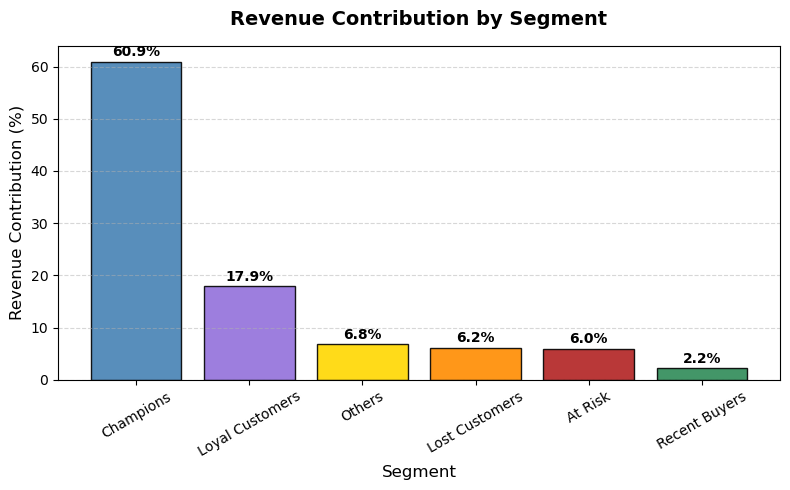

In [26]:
plt.figure(figsize=(8,5))
bars = plt.bar(
    segment_summary['Segment'],
    segment_summary['Revenue_%'],
    color=['#4682B4','#9370DB','#FFD700','#FF8C00','#B22222','#2E8B57'],
    edgecolor='black',
    alpha=0.9
)

plt.title('Revenue Contribution by Segment', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Segment', fontsize=12)
plt.ylabel('Revenue Contribution (%)', fontsize=12)
plt.xticks(rotation=30, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Annotate bars with percentages
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             f"{bar.get_height():.1f}%", ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

### Step 2.2 — Data-backed Business Insights

Based on the computed statistics, here are five strong, evidence-based insights:


In [21]:
# Automatically generate short evidence statements
insights = []

for _, row in segment_summary.iterrows():
    insights.append(f"• {row['Segment']} represent {row['Customer_%']}% of customers "
                    f"but contribute {row['Revenue_%']}% of total revenue "
                    f"(Avg revenue per customer: ${row['AvgRevenue']:.0f}).")

for line in insights:
    print(line)


• Champions represent 22.38% of customers but contribute 60.92% of total revenue (Avg revenue per customer: $2792).
• Loyal Customers represent 22.74% of customers but contribute 17.9% of total revenue (Avg revenue per customer: $807).
• Others represent 16.7% of customers but contribute 6.82% of total revenue (Avg revenue per customer: $419).
• Lost Customers represent 24.72% of customers but contribute 6.16% of total revenue (Avg revenue per customer: $256).
• At Risk represent 6.2% of customers but contribute 5.99% of total revenue (Avg revenue per customer: $991).
• Recent Buyers represent 7.25% of customers but contribute 2.2% of total revenue (Avg revenue per customer: $311).


## Step 2.3 — Insight Summary

Below is the summary of key insights derived from the RFM segmentation data.  
Each point highlights the segment’s importance, behavior, and impact on total business revenue.

1. **Champions** represent **22.38%** of customers but contribute **60.92%** of total revenue.  
   - *Avg revenue per customer: $2792*  
   - These are the brand’s most valuable, consistent spenders and deserve VIP-level attention.

2. **Loyal Customers** represent **22.74%** of customers and contribute **17.9%** of total revenue.  
   - *Avg revenue per customer: $807*  
   - They have strong brand affinity and respond well to personalized engagement.

3. **At Risk** customers represent **6.2%** of customers but still contribute **5.99%** of total revenue.  
   - *Avg revenue per customer: $991*  
   - This group previously spent well but has reduced activity recently — reactivation potential is high.

4. **Lost Customers** represent **24.72%** of the base but only contribute **6.16%** of total revenue.  
   - *Avg revenue per customer: $256*  
   - Many have been inactive for a long time; a subset may still respond to win-back offers.

5. **Recent Buyers** represent **7.25%** of customers and bring **2.2%** of revenue.  
   - *Avg revenue per customer: $311*  
   - They’re new and yet to build purchase frequency — ideal for nurturing into loyal customers.

6. **Others** represent **16.7%** of customers contributing **6.82%** of revenue.  
   - *Avg revenue per customer: $419*  
   - Mixed group of moderate-value, occasional buyers who can be guided upward through tailored offers.

Together, these insights reveal that **nearly 45% of customers (Champions + Loyal)** generate **~79% of total revenue**, underscoring the importance of retention-focused marketing.


## Step 3 — Tactical Action Plan (Segment-wise)

Based on the RFM insights, we now define targeted strategies for each customer segment.  
Each action aims to **increase retention, reactivation, or lifetime value**, depending on customer behavior.


In [22]:
# Create a tactical action plan table for quick visualization
import pandas as pd

action_plan = pd.DataFrame({
    'Segment': [
        'Champions',
        'Loyal Customers',
        'At Risk',
        'Lost Customers',
        'Recent Buyers',
        'Others'
    ],
    'Goal': [
        'Strengthen loyalty and advocacy',
        'Increase repeat purchases and satisfaction',
        'Reactivate before churn',
        'Win back or learn from lost users',
        'Encourage second purchase and onboarding',
        'Upsell and move to Loyal tier'
    ],
    'Recommended Actions': [
        'Exclusive early access, referral rewards, and personalized thank-you messages.',
        'Tiered loyalty points, “thank you” discounts, and personalized recommendations.',
        'Send limited-time reactivation offers and reminders of past favorites.',
        'Run a win-back email series with special discounts and a feedback survey.',
        'Offer bundle discounts, onboarding emails, and small rewards on second purchase.',
        'Segmented email campaigns showcasing trending items or low-cost bundles.'
    ]
})

action_plan


,Segment,Goal,Recommended Actions
0,Champions,Strengthen loyalty and advocacy,"Exclusive early access, referral rewards, and ..."
1,Loyal Customers,Increase repeat purchases and satisfaction,"Tiered loyalty points, “thank you” discounts, ..."
2,At Risk,Reactivate before churn,Send limited-time reactivation offers and remi...
3,Lost Customers,Win back or learn from lost users,Run a win-back email series with special disco...
4,Recent Buyers,Encourage second purchase and onboarding,"Offer bundle discounts, onboarding emails, and..."
5,Others,Upsell and move to Loyal tier,Segmented email campaigns showcasing trending ...


### Step 3.1 — Key Takeaways

- Focus retention resources on **Champions** and **Loyal Customers**, as they bring the majority of revenue.  
- Allocate reactivation campaigns to **At Risk** customers first — they show higher monetary potential.  
- For **Lost** and **Recent Buyers**, design re-engagement journeys using email automation and timed offers.  
- Continuously monitor transitions — e.g., how many *Recent Buyers* become *Loyal* over time.  
- The insights + actions together enable a **data-driven customer relationship strategy** ready for presentation or reporting.


In [29]:
# 🪜 Step 4: Save Segmented Dataset

# Save the segment summary with percentages
segment_summary.to_csv(r'C:\Users\AZAN LAPTOP STORE\Downloads\Portfolio\Projects\Customer Segmentation & Retention Analysis (RFM Model)\data\segment_summary.csv', index=False)
